In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("data/prostate_TumorVSNormal_train.csv",header=None)
data2 = pd.read_csv("data/prostate_TumorVSNormal_test.csv", header=None)
data = data1.append(data2)
data_length = data.shape[1]
data_length

12601

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.DataFrame(data.values,columns=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,atribut12600
0,-9,1,1,15,-2,-3,4,8,-12,-12,...,5,3,21,15,1,0,14,-23,14,Tumor
1,-2,1,1,4,-2,-5,0,8,-5,-9,...,3,2,12,7,4,5,4,-10,25,Tumor
2,-6,17,6,29,4,-11,-8,10,-24,-32,...,-5,11,11,36,8,7,21,-82,10,Tumor
3,0,9,4,19,-10,-18,-18,5,-33,-31,...,-7,6,9,22,3,20,-7,-62,24,Tumor
4,-1,0,1,5,0,-4,1,6,-4,-9,...,6,1,140,10,3,8,8,-27,20,Tumor


In [5]:
data = data.rename(columns={'atribut12600': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
0,-9,1,1,15,-2,-3,4,8,-12,-12,...,5,3,21,15,1,0,14,-23,14,Tumor
1,-2,1,1,4,-2,-5,0,8,-5,-9,...,3,2,12,7,4,5,4,-10,25,Tumor
2,-6,17,6,29,4,-11,-8,10,-24,-32,...,-5,11,11,36,8,7,21,-82,10,Tumor
3,0,9,4,19,-10,-18,-18,5,-33,-31,...,-7,6,9,22,3,20,-7,-62,24,Tumor
4,-1,0,1,5,0,-4,1,6,-4,-9,...,6,1,140,10,3,8,8,-27,20,Tumor


In [6]:
data.loc[data['status'] == 'Tumor', ['status']] = 0
data.loc[data['status'] == 'Normal', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
0,-9,1,1,15,-2,-3,4,8,-12,-12,...,5,3,21,15,1,0,14,-23,14,0
1,-2,1,1,4,-2,-5,0,8,-5,-9,...,3,2,12,7,4,5,4,-10,25,0
2,-6,17,6,29,4,-11,-8,10,-24,-32,...,-5,11,11,36,8,7,21,-82,10,0
3,0,9,4,19,-10,-18,-18,5,-33,-31,...,-7,6,9,22,3,20,-7,-62,24,0
4,-1,0,1,5,0,-4,1,6,-4,-9,...,6,1,140,10,3,8,8,-27,20,0


In [7]:
data = data.apply(pd.to_numeric)

In [8]:
data['status'].value_counts()

0    77
1    59
Name: status, dtype: int64

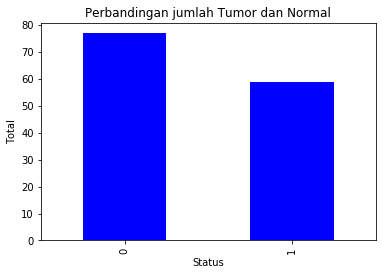

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah Tumor dan Normal")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,-15.747794,7.140441,14.322794,26.102206,95.184559,80.761765,58.069118,283.598529,276.858824,311.495588,...,5.647794,12.356618,28.948529,38.378676,18.899265,-0.889706,-9.284559,-60.025735,65.708088,0.433824
std,23.579156,13.112089,27.804428,26.811743,195.349222,187.560985,124.541759,522.450262,571.721952,653.038374,...,36.305773,15.955715,59.173232,38.801274,28.963260,34.019313,74.971347,58.260981,94.417007,0.497434
min,-116.000000,-20.000000,-12.000000,-32.000000,-51.000000,-103.000000,-44.000000,-11.000000,-124.000000,-83.000000,...,-110.000000,-12.000000,-55.000000,-4.000000,-6.000000,-199.000000,-339.000000,-226.000000,-65.000000,0.000000
25%,-22.250000,0.000000,0.000000,5.000000,-5.000000,-14.250000,-3.250000,6.000000,-18.500000,-27.250000,...,-8.250000,2.000000,5.000000,7.000000,1.000000,-1.250000,-25.500000,-93.000000,12.750000,0.000000
50%,-6.000000,3.000000,1.000000,15.000000,-1.000000,-5.000000,0.000000,13.000000,-6.500000,-10.500000,...,4.000000,5.000000,14.000000,22.000000,5.000000,5.000000,0.500000,-38.500000,23.000000,0.000000
75%,-1.750000,11.250000,14.000000,44.500000,70.000000,39.500000,34.000000,174.000000,109.000000,113.500000,...,11.250000,21.000000,25.000000,66.750000,26.250000,12.000000,18.000000,-14.000000,75.000000,1.000000
max,10.000000,61.000000,134.000000,112.000000,787.000000,801.000000,655.000000,2017.000000,2285.000000,2604.000000,...,131.000000,71.000000,489.000000,149.000000,126.000000,97.000000,281.000000,58.000000,337.000000,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

In [57]:
lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
coeff = pd.DataFrame({
    "coef" : lasso.coef_!=0
})
coeff_terpilih = np.sum(lasso.coef_!=0)
coeff_terpilih

14

In [59]:
fitur = coeff[coeff["coef"]==True].index.tolist()

In [60]:
X_trainLasso = X_train[["atribut"+str(i) for i in fitur]]
X_trainLasso.head()

,atribut315,atribut501,atribut713,atribut2273,atribut2822,atribut3076,atribut3553,atribut5154,atribut6184,atribut6461,atribut6614,atribut9625,atribut9849,atribut12066
0,0.365559,0.478992,0.526316,0.341463,0.600000,0.213483,0.119843,0.116904,0.016822,0.088435,0.119461,0.438144,0.101000,0.234848
1,0.368580,0.537815,0.429363,0.487805,0.729412,0.179775,0.068762,0.143760,0.052960,0.042517,0.075145,0.469072,0.013340,0.063131
2,0.208459,0.352941,0.529086,0.158537,0.611765,0.808989,0.106090,0.409163,1.000000,0.144558,0.396917,0.829897,0.254407,0.333333
3,0.350453,0.521008,0.451524,0.475610,0.729412,0.134831,0.542240,0.112164,0.000623,0.103741,0.136802,0.448454,0.145307,0.025253
4,0.419940,0.495798,0.443213,0.512195,0.764706,0.168539,0.051081,0.090047,0.010592,0.158163,0.138728,0.396907,0.081944,0.202020


In [61]:
X_testLasso = X_test[["atribut"+str(i) for i in fitur]]
X_testLasso.head()

,atribut315,atribut501,atribut713,atribut2273,atribut2822,atribut3076,atribut3553,atribut5154,atribut6184,atribut6461,atribut6614,atribut9625,atribut9849,atribut12066
0,1.054381,0.470588,0.894737,0.548780,0.729412,0.247191,0.141454,0.039494,0.032087,0.086735,0.210019,0.262887,0.016198,0.638889
1,0.422961,0.806723,0.268698,0.975610,0.470588,0.674157,0.216110,1.009479,0.559813,0.379252,0.321773,0.865979,0.234397,0.444444
2,0.389728,0.453782,0.468144,0.475610,0.741176,0.146067,0.056974,0.145340,0.026791,0.142857,0.131021,0.479381,0.102906,0.095960
3,0.398792,0.537815,0.440443,0.512195,0.717647,0.112360,0.076621,0.118483,0.008411,0.095238,0.034682,0.530928,0.114817,0.058081
4,0.341390,0.521008,0.459834,0.512195,0.729412,0.123596,0.068762,0.151659,0.063240,0.047619,0.046243,0.448454,0.008099,0.027778


In [62]:
model_rfg = RandomForestClassifier()

In [63]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [64]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_trainLasso, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [65]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}

0.917 (+/-0.091) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.935 (+/-0.069) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.944 (+/-0.091) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.944 (+/-0.091) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.926 (+/-0.094) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.944 (+/-0.091) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.944 (+/-0.091) for {'n_estimators': 400, 'min_samples_split': 2, 'm

In [66]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'bootstrap': True}

In [67]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['log2'],
               'min_samples_split': [5],
               'min_samples_leaf': [1],
               'bootstrap': [True]
                     }

In [68]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_trainLasso, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.8s finished


Best Params :  {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

0.944 (+/-0.091) for {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.944 (+/-0.091) for {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
0.944 (+/-0.091) for {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}
0.935 (+/-0.069) for {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
0.944 (+/-0.091) for {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


In [69]:
classifier = grid_search.best_estimator_

In [70]:
classifier.fit(X_trainLasso, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
prediksi = classifier.predict(X_testLasso)
prediksi

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

In [72]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
80,1,1
104,0,0
94,1,1
71,1,1
51,0,0
3,0,0
28,0,0
84,1,1
128,1,0
103,0,0


In [73]:
accuracy_score(y_test,prediksi)

0.9285714285714286

In [74]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.90      0.90      0.90        10

    accuracy                           0.93        28
   macro avg       0.92      0.92      0.92        28
weighted avg       0.93      0.93      0.93        28



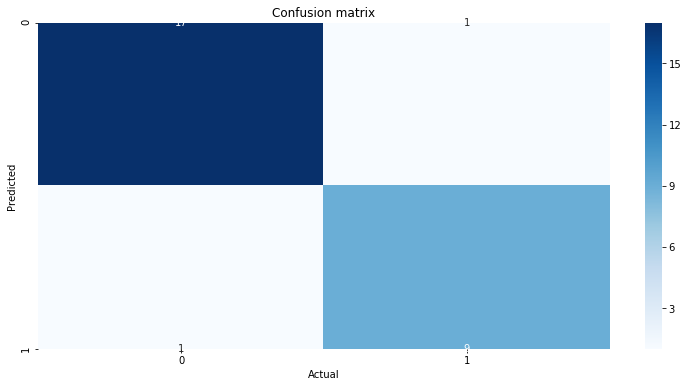

In [75]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [76]:
confusion_matrix(y_test,prediksi)

array([[17,  1],
       [ 1,  9]], dtype=int64)